# - load the csv file.
# - Do basic check - describe, head, tail, types of column, identify target variable
# - shape, 
# - na values, 
# - types of columns, 
# - information, 
# - plot basic histogram - Age, Plasma,bloodpressure, skin thickness, insulin, bmi and countplot - target variable, pregnancies
# - Pair plot also
# - correlation and heat map

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report

In [4]:
# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/manishanker/stats_ml_jun2020/master/diabetes_csv.csv")

In [5]:
pima.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [6]:
#split dataset in features and target variable
#feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure', 
#                'SkinThickness', 'DiabetesPedigreeFunction']

X = pima.drop(["class"], axis=1) # Features
y = pima["class"] # Target variable

In [7]:
y.value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [8]:
X.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=555) # 70% training and 30% test

In [27]:
y_train.value_counts()

tested_negative    340
tested_positive    197
Name: class, dtype: int64

In [28]:
y_test.value_counts()

tested_negative    160
tested_positive     71
Name: class, dtype: int64

In [29]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [30]:
# Model Accuracy, how often is the classifier correct?
print("test Accuracy:", metrics.accuracy_score(y_test, y_pred))

test Accuracy: 0.7532467532467533


In [31]:
y_pred_train = model.predict(X_train)

In [32]:
print("Train Accuracy:", metrics.accuracy_score(y_pred_train, y_train))

Train Accuracy: 1.0


In [33]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

tested_negative       0.83      0.81      0.82       160
tested_positive       0.59      0.63      0.61        71

       accuracy                           0.75       231
      macro avg       0.71      0.72      0.72       231
   weighted avg       0.76      0.75      0.76       231



# Plot the decision tree

In [34]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

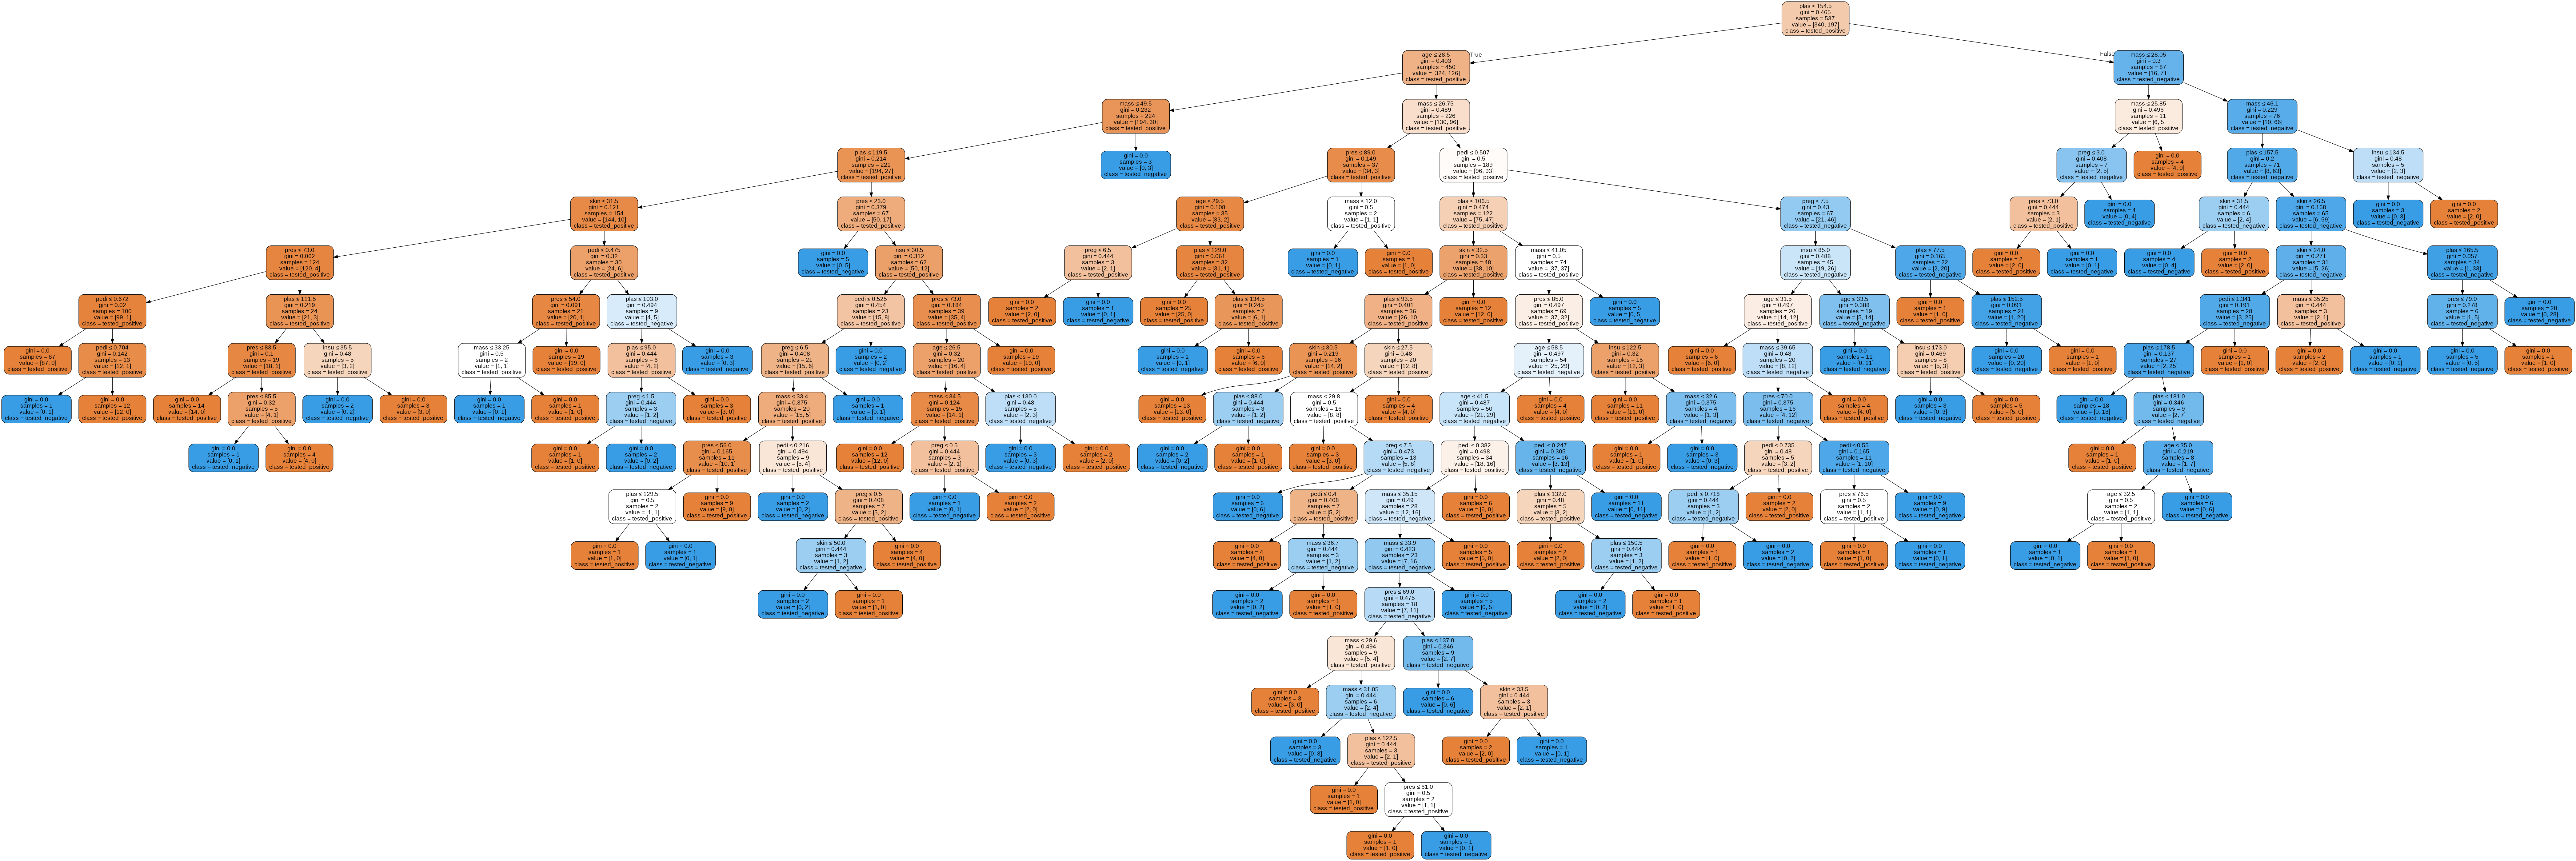

In [35]:
dot_data = StringIO()
export_graphviz(model, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['tested_positive','tested_negative'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [36]:
!pwd

/content


In [52]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf.fit(X_train, y_train)

#Predict the response for train dataset
y_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:", metrics.accuracy_score(y_train, y_pred))

#######  Test ##########
y_pred_test = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.8026070763500931
Test Accuracy: 0.7662337662337663


In [53]:
print(classification_report(y_test, y_pred_test))

                 precision    recall  f1-score   support

tested_negative       0.80      0.88      0.84       160
tested_positive       0.65      0.52      0.58        71

       accuracy                           0.77       231
      macro avg       0.73      0.70      0.71       231
   weighted avg       0.76      0.77      0.76       231



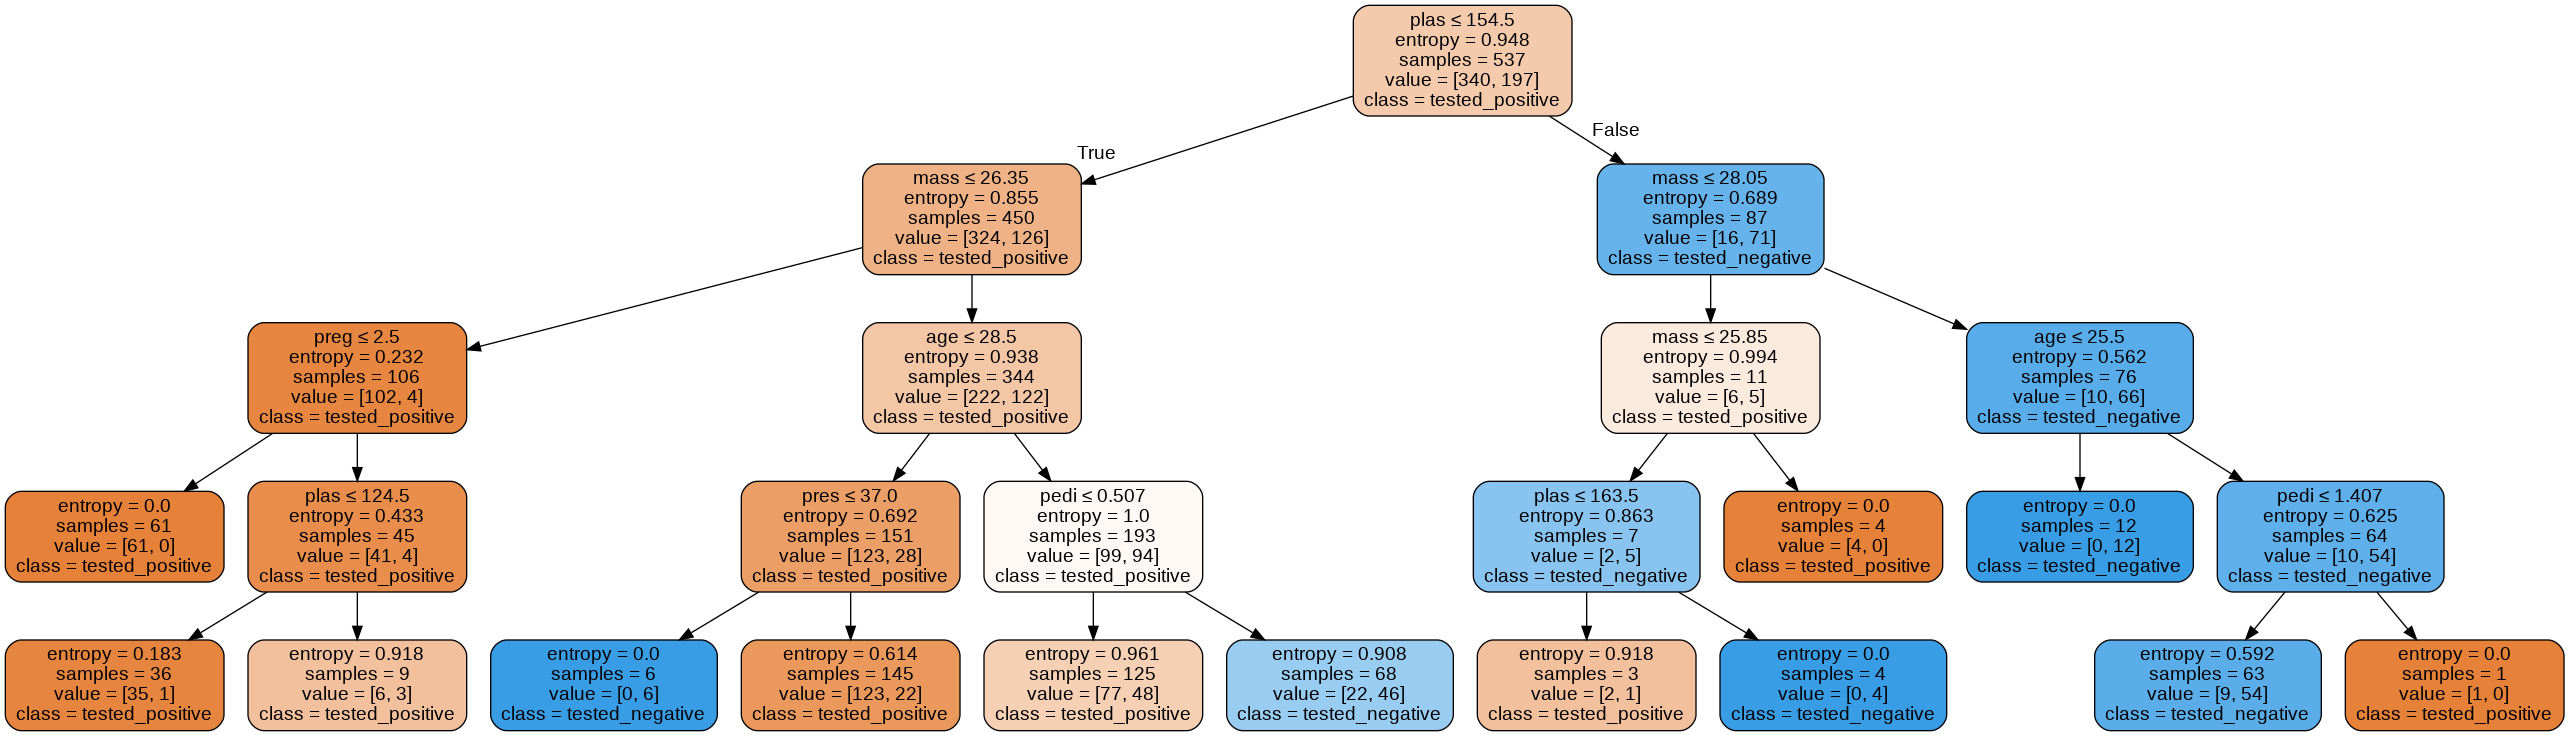

In [54]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,
                class_names=['tested_positive','tested_negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(n_estimators=170)
clf_random_forest.fit(X_train, y_train)
y_pred = clf_random_forest.predict(X_test)

print("test Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1) # 70% training and 30% test
from sklearn.svm import SVC
clf_svm = SVC(C=5)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression()
clf_logistic = clf_logistic.fit(X_train, y_train)
y_pred = clf_logistic.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
!pwd

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))